# Retail Analysis

    * It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.
    * Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits
    * Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).

In [1]:
#importing required packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
retail_df = pd.read_excel('Online Retail.xlsx')

In [3]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**Data Cleaning:**

In [4]:
retail_df.shape

(541909, 8)

In [5]:
#Looking for missing values
retail_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

There is a significant portion of missing values in the CustomerID and Description. CustomerID is a Unique field referring each customer. So, treating the missing values here is not possible because we just can't fill the CustomerID field by using mean or some other missing value treatments. And also randomly filling the Customer ID field with some values(similar to the present values) couldn't be appropriate practically. Count of Missing values of Customer ID is 135080 out of 541909(Total rows). Removing around 25 % of rows is not healthier. But in our case we have to find the value of each customers. So without knowing who is the customer, we can't do anything with their data. So I dropped all the missing CustomerID records.

In [6]:
retail_df.dropna(subset=['CustomerID'], inplace=True)

In [7]:
retail_df.shape

(406829, 8)

In [8]:
retail_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
#checking for duplicates
retail_df.duplicated().sum()

5225

In [10]:
# Dropping duplicate rows
retail_df = retail_df.drop_duplicates()

In [11]:
retail_df.duplicated().sum()

0

In [12]:
retail_df.shape

(401604, 8)

**Descriptive Analysis:**

In [13]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [14]:
retail_df['Quantity'].value_counts().head(10)

1     69605
12    59828
2     57425
6     37480
4     32093
3     26817
24    23694
10    21161
8     11594
5      8100
Name: Quantity, dtype: int64

As expected, Quantities of the Most transactions of the Customers is lower. But Surprisingly more transactions are made with Quantities 12,10,24.  

In [15]:
#Transactions count for each country
retail_df['Country'].value_counts().head(10)

United Kingdom    356728
Germany             9480
France              8475
EIRE                7475
Spain               2528
Netherlands         2371
Belgium             2069
Switzerland         1877
Portugal            1471
Australia           1258
Name: Country, dtype: int64

In [16]:
#count of unique Customers
retail_df['CustomerID'].nunique()

4372

In [17]:
#customers count for each country
customer_country = pd.DataFrame(retail_df.groupby('Country')['CustomerID'].nunique())

In [18]:
customer_country.sort_values(by='CustomerID', ascending=False).head(10)

,CustomerID
Country,
United Kingdom,3950
Germany,95
France,87
Spain,31
Belgium,25
Switzerland,21
Portugal,19
Italy,15
Finland,12


In [19]:
#transactions count by each customers
orders_bycust = pd.DataFrame(retail_df.groupby(['CustomerID'])['InvoiceNo'].nunique())
orders_bycust.head()

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [20]:
orders_bycust.sort_values(by='InvoiceNo', ascending=False).head(10)

,InvoiceNo
CustomerID,
14911.0,248
12748.0,224
17841.0,169
14606.0,128
13089.0,118
15311.0,118
12971.0,89
14527.0,86
13408.0,81


More Tranactions are done by Customers ID 14911

In [21]:
multi_orders = np.sum(orders_bycust['InvoiceNo'] > 1) / retail_df['CustomerID'].nunique()
multi_orders

0.69967978042086

69 % customers ordered more than one time.

In [22]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 21.4+ MB


**Data Transformation:**

Cohort Analysis:

In [23]:
# Create order month column based on month
retail_df['order_month'] = retail_df['InvoiceDate'].dt.to_period('M')
retail_df['order_month']

0         2010-12
1         2010-12
2         2010-12
3         2010-12
4         2010-12
           ...   
541904    2011-12
541905    2011-12
541906    2011-12
541907    2011-12
541908    2011-12
Name: order_month, Length: 401604, dtype: period[M]

In [24]:
retail_df['order_month'].nunique()

13

<AxesSubplot:xlabel='order_month'>

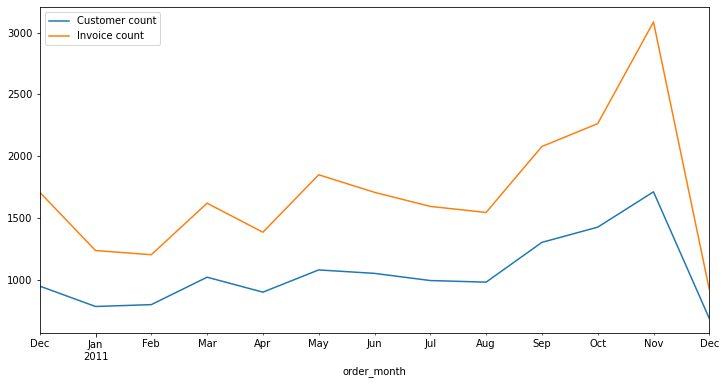

In [25]:
# Plotting the customer count and invoice count across the unique months
count_group = retail_df.groupby('order_month').agg({'CustomerID':pd.Series.nunique,
                                        'InvoiceNo':pd.Series.nunique
                                         })
count_group.columns = ['Customer count','Invoice count']
count_group.plot(figsize = (12, 6))

Above graph shows that when customer count increases, transactions count also increases

In [26]:
cohort_df = retail_df

In [27]:
# Grouping by customerID and select the order_month value
grouping_cust = cohort_df.groupby('CustomerID')['order_month']

In [28]:
# Assigning a minimum order_month value to the dataset
cohort_df['cohort_month'] = grouping_cust.transform('min')

In [29]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

In [30]:
# Getting the integers for date parts from the 'order_month' and 'cohort_month' column
transaction_year, transaction_month = get_date_int(cohort_df, 'order_month')
cohort_year, cohort_month = get_date_int(cohort_df, 'cohort_month')

In [31]:
years_diff = transaction_year - cohort_year

In [32]:
months_diff = transaction_month - cohort_month

In [33]:
cohort_df['cohort_index'] = years_diff * 12 + months_diff  + 1 
cohort_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_month,cohort_month,cohort_index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010-12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,1


In [34]:
# Counting daily active user from each chort
grouping_cohort = cohort_df.groupby(['cohort_month', 'cohort_index'])
# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = grouping_cohort['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_data.head()

,cohort_month,cohort_index,CustomerID
0,2010-12,1,948
1,2010-12,2,362
2,2010-12,3,317
3,2010-12,4,367
4,2010-12,5,341


In [35]:
cohort_counts = cohort_data.pivot(index='cohort_month',
                                 columns ='cohort_index',
                                 values = 'CustomerID')
cohort_counts

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_month,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
print(cohort_sizes)

cohort_month
2010-12    948.0
2011-01    421.0
2011-02    380.0
2011-03    440.0
2011-04    299.0
2011-05    279.0
2011-06    235.0
2011-07    191.0
2011-08    167.0
2011-09    298.0
2011-10    352.0
2011-11    321.0
2011-12     41.0
Freq: M, Name: 1, dtype: float64


In [37]:
# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_month,,,,,,,,,,,,,
2010-12,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


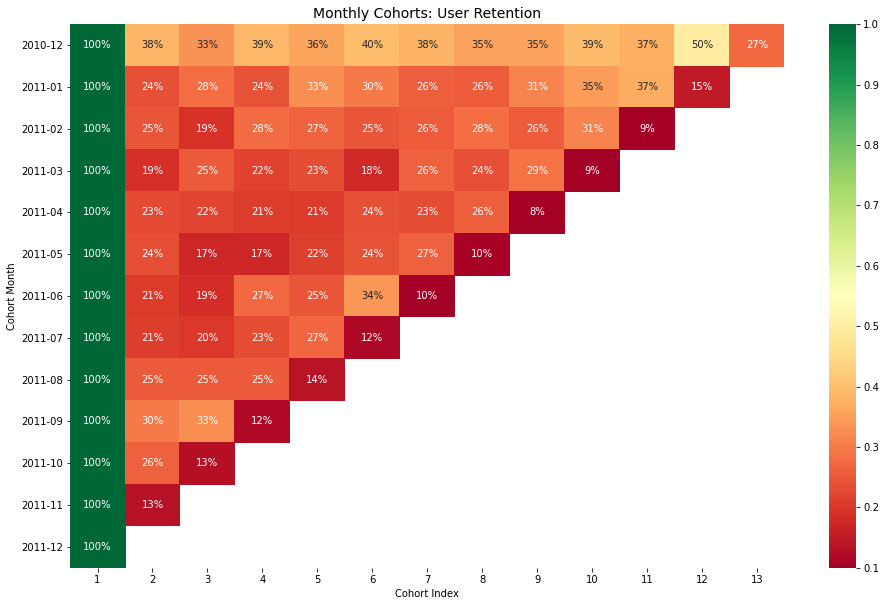

In [38]:
plt.figure(figsize=(16, 10))
plt.title('Monthly Cohorts: User Retention', fontsize = 14)
sns.heatmap(retention, annot = True,vmin = 0.1, vmax =1.0,cmap="RdYlGn", fmt='.0%')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

From the above analysis, it is clear that retention rate is getting lower with months.

In [39]:
#Mean of the Quantity Sold for each cohort
cohort_quantity = cohort_df.groupby(['cohort_month', 'cohort_index'])['Quantity'].mean().reset_index()

avg_quantity = cohort_quantity.pivot_table(index = "cohort_month",
                        columns = "cohort_index",
                        values = "Quantity").round(1)
avg_quantity

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_month,,,,,,,,,,,,,
2010-12,11.2,14.7,15.1,15.0,13.1,14.4,15.3,14.9,16.8,16.8,17.5,13.0,14.9
2011-01,10.1,12.7,12.4,11.0,12.3,15.0,14.3,14.5,11.5,10.0,9.3,9.7,NaN
2011-02,10.9,12.3,18.6,12.0,11.2,11.5,13.4,12.4,10.4,12.0,12.7,NaN,NaN
2011-03,9.8,10.0,12.2,9.5,13.0,12.4,13.2,12.3,10.7,9.1,NaN,NaN,NaN
2011-04,9.8,10.1,9.4,11.6,11.6,8.3,9.8,9.5,7.4,NaN,NaN,NaN,NaN
2011-05,11.0,9.1,14.0,11.8,11.0,8.7,10.3,7.6,NaN,NaN,NaN,NaN,NaN
2011-06,10.4,13.9,10.5,13.4,10.4,9.9,9.3,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,9.8,12.7,7.2,7.9,6.1,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,9.9,6.0,5.4,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Data Modelling:**

RFM Metrics:
* Recency means the number of days since a customer made the last purchase
* Frequency is the number of purchase in a given period
* Monetary is the total amount of money a customer spent in that given period
* Worth Customers will be differentiated among other customers by the measures least recency,Ordered More frequency, higher the monetory spends

In [40]:
#Finding the latest date
from datetime import timedelta
latest_date = retail_df['InvoiceDate'].max() + timedelta(days = 1)
latest_date

Timestamp('2011-12-10 12:50:00')

In [41]:
retail_df['sales_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']

In [42]:
#creating rfm table
rfm_table = retail_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days, 
                                                 'InvoiceNo': lambda x: len(x),
                                                 'sales_amount': lambda x: x.sum()})
rfm_table

,InvoiceDate,InvoiceNo,sales_amount
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [43]:
rfm_table.rename(columns = {'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'sales_amount': 'Monetary'}, inplace = True)

rfm_table.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [44]:
#recency must be low
#frequency must be high
#monetory should be high
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

In [45]:
# Assign these labels to 4 equal percentile groups 
R = pd.qcut(rfm_table['Recency'], q = 4, labels = r_labels) 
F = pd.qcut(rfm_table['Frequency'], q = 4, labels = f_labels)
M = pd.qcut(rfm_table['Monetary'], q = 4, labels = m_labels)

In [46]:
rfm_table = rfm_table.assign(R = R.values, F = F.values, M = M.values)
rfm_table.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


In [47]:
#Combining three ratings to get a RFM Segment (as strings).
rfm_table['RFM_Segment'] = rfm_table.R.astype(str)+rfm_table.F.astype(str)+rfm_table.R.astype(str)
rfm_table.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,111
12347.0,2,182,4310.00,4,4,4,444
12348.0,75,31,1797.24,2,2,4,222
12349.0,19,73,1757.55,3,3,4,333
12350.0,310,17,334.40,1,1,2,111


In [48]:
rfm_table['RFM_Score'] = rfm_table[['R','F','M']].sum(axis = 1)

In [49]:
#Get the RFM score by adding up the three ratings.
rfm_table['RFM_Score'] = rfm_table['RFM_Score'].apply(lambda x : int(x))
rfm_table.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3
12347.0,2,182,4310.00,4,4,4,444,12
12348.0,75,31,1797.24,2,2,4,222,8
12349.0,19,73,1757.55,3,3,4,333,10
12350.0,310,17,334.40,1,1,2,111,4


In [50]:
rfm_table['RFM_Segment'].unique()

array(['111', '444', '222', '333', '131', '343', '424', '242', '434',
       '121', '414', '232', '323', '141', '313', '212'], dtype=object)

In [51]:
rfm_table['RFM_Segment'].value_counts()

444    569
111    524
121    349
222    331
333    329
343    323
212    302
434    300
232    293
323    240
313    182
131    167
424    157
242    153
414    105
141     48
Name: RFM_Segment, dtype: int64

In [52]:
rfm_table['RFM_Score'].unique()

array([ 3, 12,  8, 10,  4,  9,  7, 11,  6,  5], dtype=int64)

In [53]:
rfm_table['RFM_Score'].value_counts()

5     515
12    470
6     469
8     467
10    442
7     439
9     413
3     393
4     390
11    374
Name: RFM_Score, dtype: int64

In [54]:
#assiging label for he customers based on the RFM Segment
def rfm_segment(df):
    if ((df['RFM_Segment'] == '444') or (df['RFM_Segment'] == '343') or 
        (df['RFM_Segment'] == '434') or (df['RFM_Segment'] == '333')):
        return 'Worth Customers'
    elif ((df['RFM_Segment'] == '141') or (df['RFM_Segment'] == '131') or 
          (df['RFM_Segment'] == '242') or (df['RFM_Segment'] == '131')):
        return 'Frequent Customers'
    elif ((df['RFM_Segment'] == '424') or (df['RFM_Segment'] == '414')):
        return 'Big Spenders'
    elif ((df['RFM_Segment'] == '111') or (df['RFM_Segment'] == '121') or 
          (df['RFM_Segment'] == '212')):
        return 'Unimportant Customers'
    else:
        return 'Average Customers'
# Create a new variable RFM_Level
rfm_table['RFM_label'] = rfm_table.apply(rfm_segment, axis=1)
rfm_table.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_label
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3,Unimportant Customers
12347.0,2,182,4310.00,4,4,4,444,12,Worth Customers
12348.0,75,31,1797.24,2,2,4,222,8,Average Customers
12349.0,19,73,1757.55,3,3,4,333,10,Worth Customers
12350.0,310,17,334.40,1,1,2,111,4,Unimportant Customers


In [55]:
#Description of the each Segments
rfm_segments = {'Customer Segement':['Worth Customers', 'Frequent Customers', 'Big Spenders', 
                                     'Unimportant Customers','Average Customers'], 
                'RFM':['444/434/343/333', 'X4X/X3X', 'XX4/XX3', '111/121/131/212','Remaining'],
                'Desrciption':['Bought Most Recently and More Often', 'Bought Most Frequently', 'Spent The Most', 
                               'Few Orders and Spends little and last Order long time ago',
                               'Average Purchase and spends']}
pd.DataFrame(rfm_segments)

,Customer Segement,RFM,Desrciption
0,Worth Customers,444/434/343/333,Bought Most Recently and More Often
1,Frequent Customers,X4X/X3X,Bought Most Frequently
2,Big Spenders,XX4/XX3,Spent The Most
3,Unimportant Customers,111/121/131/212,Few Orders and Spends little and last Order lo...
4,Average Customers,Remaining,Average Purchase and spends


In [56]:
rfm_table['RFM_Segment'].value_counts()

444    569
111    524
121    349
222    331
333    329
343    323
212    302
434    300
232    293
323    240
313    182
131    167
424    157
242    153
414    105
141     48
Name: RFM_Segment, dtype: int64

1521 Customers had good RFM score and there are 262 Big Spenders and 368 Frequent Customers

**Data Modelling**

k-means clustering algorithm:

In [57]:
#Taking the main features recency,frequency and monetary for Clustering
cluster_df = rfm_table.reset_index(level=0).iloc[:,[1,2,3]].values

In [58]:
pd.DataFrame(cluster_df)

,0,1,2
0,326.0,2.0,0.00
1,2.0,182.0,4310.00
2,75.0,31.0,1797.24
3,19.0,73.0,1757.55
4,310.0,17.0,334.40
...,...,...,...
4367,278.0,10.0,180.60
4368,181.0,7.0,80.82
4369,8.0,13.0,176.60
4370,4.0,721.0,2045.53


In [59]:
#since the data is assymetrically distributed, we are going to standardize it.
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_df)

In [60]:
# statistics of scaled data
pd.DataFrame(cluster_scaled).describe()

,0,1,2
count,4.372000e+03,4.372000e+03,4.372000e+03
mean,-7.412491e-17,-2.720326e-18,-2.131821e-17
std,1.000114e+00,1.000114e+00,1.000114e+00
min,-9.036584e-01,-3.964190e-01,-7.521714e-01
25%,-7.448556e-01,-3.266102e-01,-1.949117e-01
50%,-4.173249e-01,-2.218969e-01,-1.520441e-01
75%,5.057162e-01,3.225086e-02,-3.470490e-02
max,2.798431e+00,3.368338e+01,3.377996e+01


In [61]:
from sklearn.cluster import KMeans

In [62]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(cluster_scaled)

KMeans(n_clusters=4)

In [63]:
kmeans.inertia_

4021.273292952168

In [64]:
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(cluster_scaled)
    SSE.append(kmeans.inertia_)
SSE

[13116.000000000007,
 8984.492117739526,
 5404.124012711434,
 4021.273292952168,
 2943.25352845654,
 2322.8113212503836,
 1862.9164518479301,
 1619.0281260743673,
 1456.4616669871355]

Text(0, 0.5, 'Inertia')

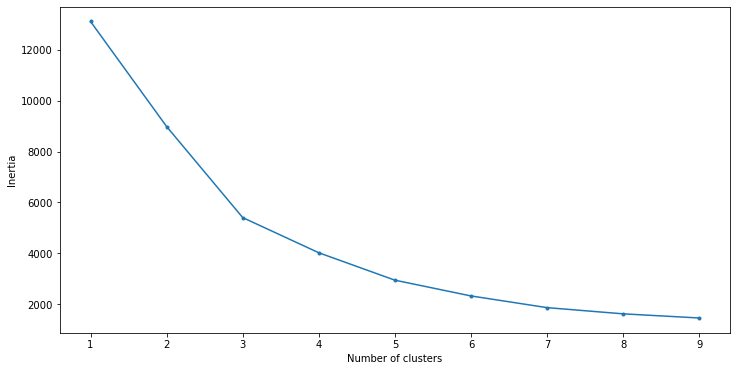

In [65]:
# converting the results into a dataframe and plotting them
choose_k = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(choose_k['Cluster'], choose_k['SSE'], marker='.')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

From the graph, it is cleared that 4 or 5 is the effective customers count.
Here, Choosing 5 as the clusters count

In [66]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(cluster_scaled)
pred = kmeans.predict(cluster_scaled)

In [67]:
final_df = pd.DataFrame(cluster_scaled)
final_df['cluster'] = pred

In [68]:
final_df.columns =['R', 'F', 'M', 'cluster']
final_df.head()

,R,F,M,cluster
0,2.322023,-0.392056,-0.230420,1
1,-0.893733,0.393293,0.294055,3
2,-0.169196,-0.265527,-0.011717,3
3,-0.725005,-0.082279,-0.016547,3
4,2.163220,-0.326610,-0.189727,1


In [69]:
final_df['cluster'].value_counts()

3    3045
1    1070
0     248
2       5
4       4
Name: cluster, dtype: int64

Text(0, 0.5, 'Money Spend')

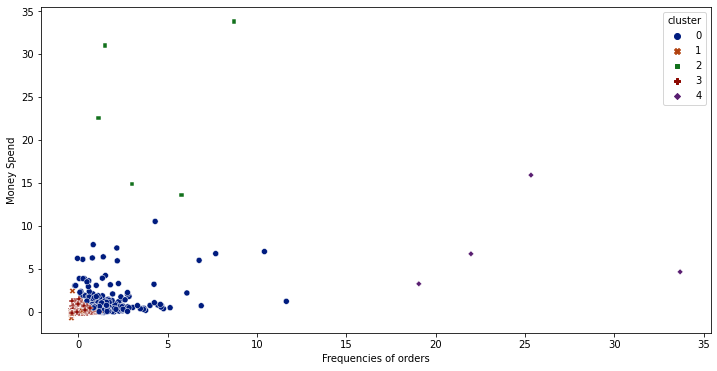

In [70]:
plt.subplots(figsize=(12, 6))
sns.scatterplot(data=final_df, x="F", y="M", hue="cluster", style="cluster", palette="dark")
plt.xlabel('Frequencies of orders')
plt.ylabel('Money Spend')

Cluster 2 and 4 the most valuable customers.
Cluster 0 denotes the loyal customers.

In [73]:
#labelling the clusters
def cluster_level(df):
    if df['cluster'] == 3:
        return 'Unimportant Customers'
    elif df['cluster'] == 1:
        return 'Normal Customers'
    elif df['cluster'] == 4:
        return 'Very Frequent Customers'
    elif df['cluster'] == 2:
        return 'Big Spenders'
    else:
        return 'Good Customers'
    
final_df['Cluster_Label'] = final_df.apply(cluster_level, axis=1)
final_df.head()

,R,F,M,cluster,Cluster_Label
0,2.322023,-0.392056,-0.230420,1,Normal Customers
1,-0.893733,0.393293,0.294055,3,Unimportant Customers
2,-0.169196,-0.265527,-0.011717,3,Unimportant Customers
3,-0.725005,-0.082279,-0.016547,3,Unimportant Customers
4,2.163220,-0.326610,-0.189727,1,Normal Customers


In [74]:
final_df['Cluster_Label'].value_counts()

Unimportant Customers      3045
Normal Customers           1070
Good Customers              248
Big Spenders                  5
Very Frequent Customers       4
Name: Cluster_Label, dtype: int64

* Clusters "Big Spenders" and "Very Frequent Customers" are most valuable customers. Retaining them is very important.
* Cluster "Good Customers" are loyal customers. Have to provide More offers and support to retain them and increase their frequency and spends
* Cluster "Normal Customer" are good. Have to take steps to retain them.
* Many customers of the retail store are about to lost. Have to take measures to retain them.